In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/sales.csv')

In [3]:
data.head()

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,0,625,3,2013-11-06,641,1,1,0,0,7293
1,1,293,2,2013-07-16,877,1,1,0,1,7060
2,2,39,4,2014-01-23,561,1,1,0,0,4565
3,3,676,4,2013-09-26,1584,1,1,0,0,6380
4,4,709,3,2014-01-22,1477,1,1,0,0,11647


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   True_index           640840 non-null  int64 
 1   Store_ID             640840 non-null  int64 
 2   Day_of_week          640840 non-null  int64 
 3   Date                 640840 non-null  object
 4   Nb_customers_on_day  640840 non-null  int64 
 5   Open                 640840 non-null  int64 
 6   Promotion            640840 non-null  int64 
 7   State_holiday        640840 non-null  object
 8   School_holiday       640840 non-null  int64 
 9   Sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB


In [5]:
data.dtypes

True_index              int64
Store_ID                int64
Day_of_week             int64
Date                   object
Nb_customers_on_day     int64
Open                    int64
Promotion               int64
State_holiday          object
School_holiday          int64
Sales                   int64
dtype: object

In [6]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

In [7]:
data['State_holiday'].value_counts()

State_holiday
0    621160
a     12842
b      4214
c      2624
Name: count, dtype: int64

In [8]:
data = pd.get_dummies(data, columns=['State_holiday'])

In [9]:
data

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,School_holiday,Sales,State_holiday_0,State_holiday_a,State_holiday_b,State_holiday_c
0,0,625,3,2013-11-06,641,1,1,0,7293,True,False,False,False
1,1,293,2,2013-07-16,877,1,1,1,7060,True,False,False,False
2,2,39,4,2014-01-23,561,1,1,0,4565,True,False,False,False
3,3,676,4,2013-09-26,1584,1,1,0,6380,True,False,False,False
4,4,709,3,2014-01-22,1477,1,1,0,11647,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
640835,712040,674,6,2014-09-20,611,1,0,0,4702,True,False,False,False
640836,712041,1014,4,2015-01-15,1267,1,1,0,12545,True,False,False,False
640837,712042,135,6,2015-06-20,595,1,0,0,5823,True,False,False,False
640838,712043,810,1,2014-08-18,599,1,1,1,7986,True,False,False,False


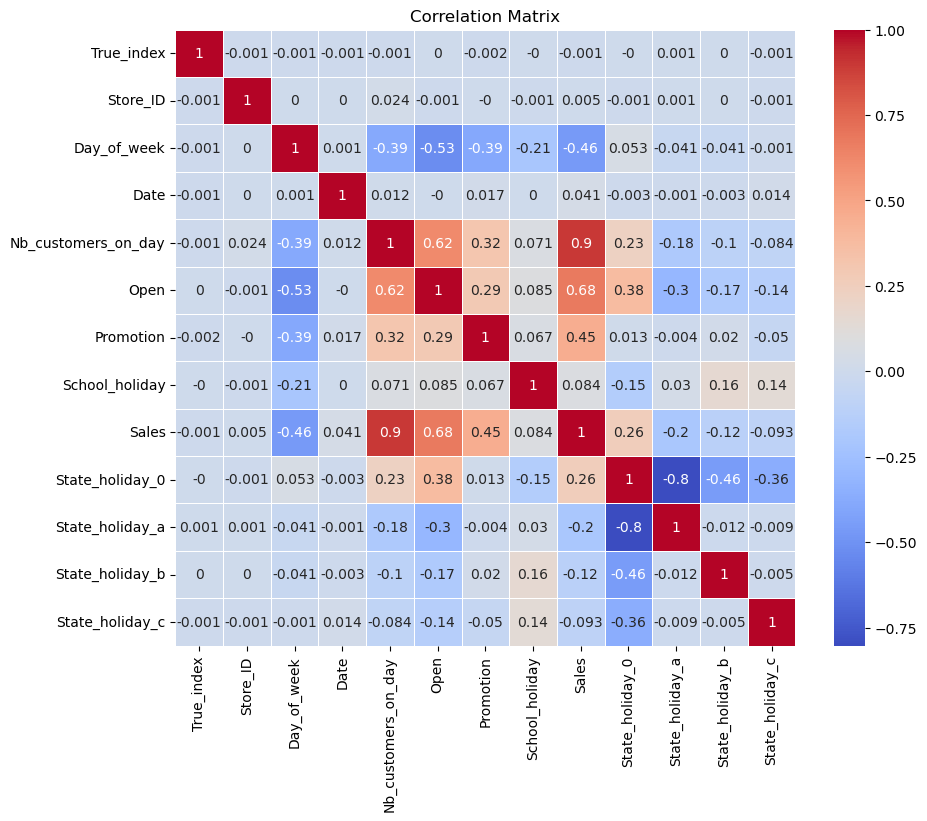

In [10]:
numerical_columns = data[['Nb_customers_on_day', 'Open', 'Promotion', 'School_holiday', 'Sales', 'State_holiday_a', 'State_holiday_b', 'State_holiday_c']]

correlation_matrix = data.corr().round(3)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [11]:
#ordenar la data según la fecha
data.sort_values('Date', ascending = True, inplace = True)

In [12]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['WeekOfYear'] = data['Date'].dt.isocalendar().week

In [13]:
features = ['Nb_customers_on_day', 'Open', 'Promotion', 'School_holiday',
    'State_holiday_a', 'State_holiday_b', 'State_holiday_c',
    'Year', 'Month', 'Day', 'WeekOfYear', 'Day_of_week']

In [14]:
X = data[features]
y = data['Sales']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestRegressor(n_estimators=300, random_state=42)
rfc.fit(X_train, y_train)

accuracy_rfc = rfc.score(X_test, y_test)
print(f"Model R^2 accuracy: {accuracy_rfc:.4f}")

Model R^2 accuracy: 0.8586


In [24]:
y_pred = rfc.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 957.9241
Root Mean Squared Error (RMSE): 1446.4326


c:\Users\almuo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [19]:
data['Sales'].describe()

count    640840.000000
mean       5777.469011
std        3851.338083
min           0.000000
25%        3731.000000
50%        5746.000000
75%        7860.000000
max       41551.000000
Name: Sales, dtype: float64

In [25]:
new_data = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/ironkaggle_notarget.csv") 
new_data['Date'] = pd.to_datetime(new_data['Date']) 


new_data['Year'] = new_data['Date'].dt.year
new_data['Month'] = new_data['Date'].dt.month
new_data['Day'] = new_data['Date'].dt.day
new_data['WeekOfYear'] = new_data['Date'].dt.isocalendar().week

new_data = pd.get_dummies(new_data, columns=['State_holiday'], drop_first=True)

features = ['Nb_customers_on_day', 'Open', 'Promotion', 'School_holiday',
    'State_holiday_a', 'State_holiday_b', 'State_holiday_c',
    'Year', 'Month', 'Day', 'WeekOfYear', 'Day_of_week']

In [26]:
X_new = new_data[features]
y_new_pred = rfc.predict(X_new)

In [27]:
predictions = pd.DataFrame({
    'Date': new_data['Date'],
    'Predicted_Sales': y_new_pred})

predictions.to_csv("sales_predictions.csv", index=False)
print("Predicciones guardadas en 'sales_predictions.csv'.")

Predicciones guardadas en 'sales_predictions.csv'.


In [28]:
predictions = pd.read_csv("sales_predictions.csv")
real_sales = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/ironkaggle_solutions.csv") 

In [29]:
predictions.columns

Index(['Date', 'Predicted_Sales'], dtype='object')

In [30]:
real_sales.columns

Index(['True_index', 'Sales'], dtype='object')

In [32]:
mae = mean_absolute_error(real_sales['Sales'], predictions['Predicted_Sales'])
rmse = mean_squared_error(real_sales['Sales'], predictions['Predicted_Sales'], squared=False)

print('MAE', mae)

print('RMSE', rmse)

MAE 677.5120255571823
RMSE 1061.0730590626445


c:\Users\almuo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
